# Litecoin Price

In [2]:
import csv
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/raw/bitcoin/litecoin_price.csv')

In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1587,"May 02, 2013",3.78,4.04,3.01,3.37,-,65242700
1588,"May 01, 2013",4.29,4.36,3.52,3.80,-,73901200
1589,"Apr 30, 2013",4.40,4.57,4.17,4.30,-,75726800
1590,"Apr 29, 2013",4.37,4.57,4.23,4.38,-,74952700
1591,"Apr 28, 2013",4.30,4.40,4.18,4.35,-,73773400


In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 05, 2017",65.25,72.44,59.05,71.29,1016090000,3444150000
1,"Sep 04, 2017",76.73,76.73,61.24,65.21,922041000,4049140000
2,"Sep 03, 2017",78.98,82.83,73.61,76.84,675462000,4166600000
3,"Sep 02, 2017",85.83,92.07,72.23,79.02,1363990000,4526680000
4,"Sep 01, 2017",70.86,87.41,70.01,86.04,1551740000,3735870000


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

There are missing data here and there are several data which have different format. Some of the data do not use number format

In [14]:
df['Volume'] = df['Volume'].replace('-', 'NaN')
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 

In [15]:
df.count()

Date          1592
Open          1592
High          1592
Low           1592
Close         1592
Volume        1349
Market Cap    1592
dtype: int64

Convert time column into date time format

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1587,2013-05-02,3.78,4.04,3.01,3.37,NaN,65242700
1588,2013-05-01,4.29,4.36,3.52,3.80,NaN,73901200
1589,2013-04-30,4.40,4.57,4.17,4.30,NaN,75726800
1590,2013-04-29,4.37,4.57,4.23,4.38,NaN,74952700
1591,2013-04-28,4.30,4.40,4.18,4.35,NaN,73773400


In [20]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap             int64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 7 columns):
Date          1592 non-null datetime64[ns]
Open          1592 non-null float64
High          1592 non-null float64
Low           1592 non-null float64
Close         1592 non-null float64
Volume        1349 non-null float64
Market Cap    1592 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 87.1 KB


In [22]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Volume,243,0.152638
Market Cap,0,0.000000


<function matplotlib.pyplot.show(*args, **kw)>

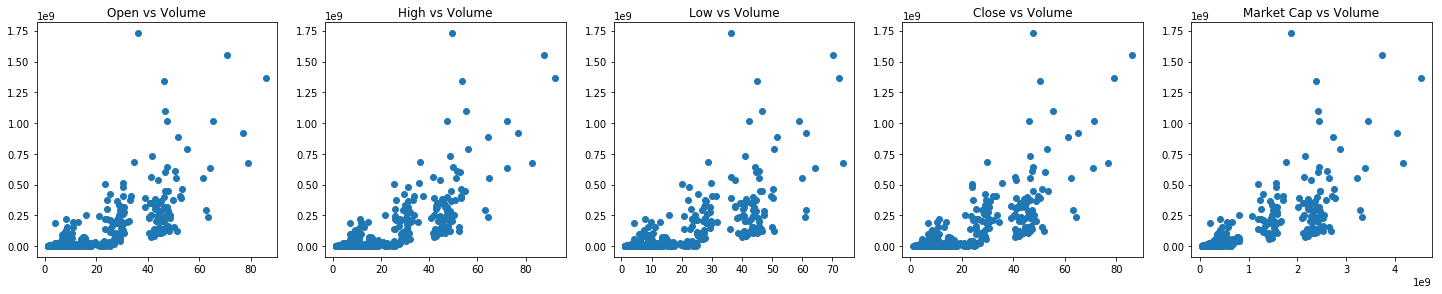

In [24]:
#Plot data to see the relation between each column
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
O = df['Open']
H = df['High']
L = df['Low']
C = df['Close']
V = df['Volume']
MC = df['Market Cap']

plt.subplot(5,5,1)
plt.scatter(O, V)
plt.title('Open vs Volume')

plt.subplot(5,5,2)
plt.scatter(H, V)
plt.title('High vs Volume')

plt.subplot(5,5,3)
plt.scatter(L, V)
plt.title('Low vs Volume')

plt.subplot(5,5,4)
plt.scatter(C, V)
plt.title('Close vs Volume')

plt.subplot(5,5,5)
plt.scatter(MC, V)
plt.title('Market Cap vs Volume')

plt.show

To fill the NaN value I try to interpolate the data using linear method using value from Open column. Because from the figure above we can see that Volume almost has same condition with other column

In [25]:
from sklearn import linear_model

model = linear_model.LinearRegression()
Open  = df[['Open']].iloc[0:1348]
Volume = df['Volume'].iloc[0:1348]

In [26]:
#Train model 
model.fit(Open, Volume)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#The model score almost 1 so that indicate the model is near to the truth
model.score(Open, Volume)

0.5488524945545914

In [30]:
#Add a new column which is filled the missing data from model fit
open = df[['Open']]
Volume_Predict = model.predict(open)
df['Volume Predict'] = Volume_Predict
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Volume Predict
1587,2013-05-02,3.78,4.04,3.01,3.37,NaN,65242700,-6.642012e+06
1588,2013-05-01,4.29,4.36,3.52,3.80,NaN,73901200,-2.416477e+06
1589,2013-04-30,4.40,4.57,4.17,4.30,NaN,75726800,-1.505087e+06
1590,2013-04-29,4.37,4.57,4.23,4.38,NaN,74952700,-1.753648e+06
1591,2013-04-28,4.30,4.40,4.18,4.35,NaN,73773400,-2.333623e+06


Here I make a new column Volume Predict which contains Volume with no NaN value

In [33]:
df.count()

Date              1592
Open              1592
High              1592
Low               1592
Close             1592
Volume            1349
Market Cap        1592
Volume Predict    1592
dtype: int64

The data is clean, no null value and has same format